# Finex (Credit Card Fraud Detection)
### **Problem Statement**:
Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis.

### **Solution**:
Performing root cause analysis for the increasing number of frauds and building a fraud detection system using different ML techniques to identify fraudulent activities at the right time and prevent them from happening.

### **Solution Approach**:
1. Exploratory Data Analysis
2. Preparing Data for Modeling
3. Building the Models
4. Selecting the best model

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
import statsmodels.api as sm
import imblearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Setting the visual preference
plt.style.use('classic')

## Task 1: Exploratory Data Analysis

### Subtask 1.1: Read and inspect the data

In [5]:
df = pd.read_csv('C:/demo/Credit_Card_Fraud/fraudTrain.csv')

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df.shape

(1296675, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
Unnamed: 0               1296675 non-null int64
trans_date_trans_time    1296675 non-null object
cc_num                   1296675 non-null int64
merchant                 1296675 non-null object
category                 1296675 non-null object
amt                      1296675 non-null float64
first                    1296675 non-null object
last                     1296675 non-null object
gender                   1296675 non-null object
street                   1296675 non-null object
city                     1296675 non-null object
state                    1296675 non-null object
zip                      1296675 non-null int64
lat                      1296675 non-null float64
long                     1296675 non-null float64
city_pop                 1296675 non-null int64
job                      1296675 non-null object
dob                      1296675 non-null object
trans_

In [9]:
# Missing values
round(df.isnull().sum()/len(df.index)*100, 2)

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [10]:
# Duplicate Values
df.duplicated().sum()

0

In [11]:
df['is_fraud'].value_counts(normalize = True).round(3)

0    0.994
1    0.006
Name: is_fraud, dtype: float64

**Explanation**: The data set has 12,96,
675 rows with 23 columns. The column 'is_fraud' is a target variable having an imbalance class, with positive class just accountinng for 0.006%. None of the columns have missing or duplicate values. Further inspecting the data for any skewness.

### Subtask 1.2: Feature Engineering

In [12]:
# Extracting age from DOB
df['dob'] = pd.to_datetime(df['dob'])
df['yob'] = df['dob'].dt.year
df['age'] = df['yob'].apply(lambda x: 2021-x)

In [13]:
# Calculating distance between merchant's location and card holder's home location
df['distance'] = df.apply(lambda x: geopy.distance.great_circle((x['lat'], x['long']), 
                      (x['merch_lat'], x['merch_long'])).km, axis = 1)
df['distance'] = df['distance'].astype(int)

In [14]:
# Hour encoding: Normal hrs [05:00 to 21:00] vs abnormal hrs [21:00 to 5:00]
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour_encoding'] = df['trans_date_trans_time'].dt.hour.apply(lambda x: 0 if x > 5 and x < 21 else 1)

In [15]:
# Calculating time since last transaction made
df['time_diff'] = df.sort_values(by = 'trans_date_trans_time', ascending = False).groupby('cc_num')['unix_time'].diff(periods = -1)
df['time_diff'] = df['time_diff'].fillna(0).astype(int)
df = df.loc[df['time_diff']>0,:]

In [16]:
# Creating a fraud df with all fraud transactions
fraud = df.loc[df['is_fraud'] == 1]
fraud['value'] = fraud['merchant'].map(fraud['merchant'].value_counts())

In [17]:
# Blacklisting merchants with whom there has been > 15 fraudulent transactions and encoding it as 1
fraud_merchant = []
fraud_merchant = fraud.loc[fraud['value'] > 15]['merchant'].unique()
fraud_merchant = list(fraud_merchant)
df['fraud_merchant'] = df['merchant'].map(lambda x: 1 if x in fraud_merchant else 0)

**Explanation**: From the given raw data few special features are extracted to help us analyse the fraudulent activities better and also to enhance the performance of Machine Learning algorithms. 

### Subtask 1.3: Data Cleaning

In [18]:
# Checking the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295113 entries, 43 to 1296674
Data columns (total 29 columns):
Unnamed: 0               1295113 non-null int64
trans_date_trans_time    1295113 non-null datetime64[ns]
cc_num                   1295113 non-null int64
merchant                 1295113 non-null object
category                 1295113 non-null object
amt                      1295113 non-null float64
first                    1295113 non-null object
last                     1295113 non-null object
gender                   1295113 non-null object
street                   1295113 non-null object
city                     1295113 non-null object
state                    1295113 non-null object
zip                      1295113 non-null int64
lat                      1295113 non-null float64
long                     1295113 non-null float64
city_pop                 1295113 non-null int64
job                      1295113 non-null object
dob                      1295113 non-null date

In [19]:
df['category'].value_counts(normalize = True).round(2)

gas_transport     0.10
grocery_pos       0.10
home              0.09
shopping_pos      0.09
kids_pets         0.09
shopping_net      0.08
entertainment     0.07
food_dining       0.07
personal_care     0.07
health_fitness    0.07
misc_pos          0.06
misc_net          0.05
grocery_net       0.04
travel            0.03
Name: category, dtype: float64

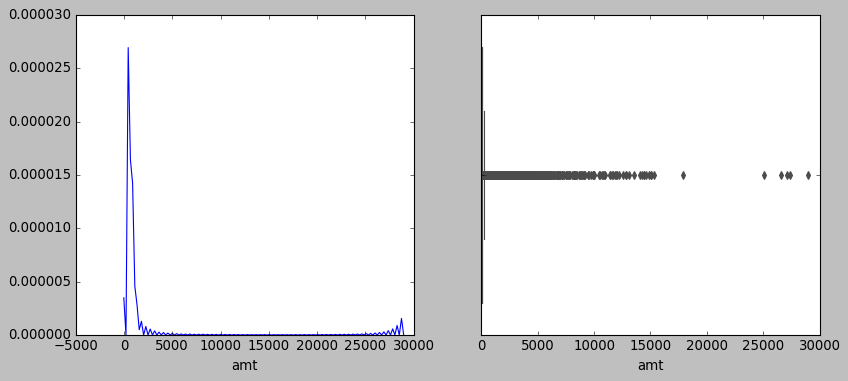

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df['amt'], hist = False)
plt.subplot(122)
sns.boxplot(df['amt'])
plt.show()

In [21]:
df['gender'].value_counts(normalize = True).round(2)

F    0.55
M    0.45
Name: gender, dtype: float64

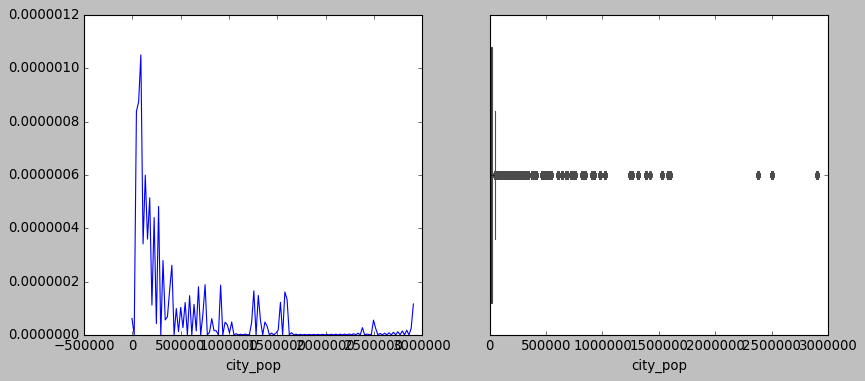

In [22]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df['city_pop'], hist = False)
plt.subplot(122)
sns.boxplot(df['city_pop'])
plt.show()

In [23]:
df['hour_encoding'].value_counts(normalize = True).round(2)

0    0.65
1    0.35
Name: hour_encoding, dtype: float64

In [24]:
df['fraud_merchant'].value_counts(normalize = True).round(2)

0    0.71
1    0.29
Name: fraud_merchant, dtype: float64

In [25]:
# Encoding gender with 1 = Male and 0 = Female
df['gender'] = df['gender'].map(lambda x: 1 if x == 'M' else 0)

In [26]:
# Dropping unnecessary columns
to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 
        'city', 'state', 'job', 'dob', 'trans_num', 'lat', 'long', 'merch_lat', 'merch_long', 'yob']
train_df = df.drop(df[to_drop], axis = 1)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295113 entries, 43 to 1296674
Data columns (total 12 columns):
category          1295113 non-null object
amt               1295113 non-null float64
gender            1295113 non-null int64
zip               1295113 non-null int64
city_pop          1295113 non-null int64
unix_time         1295113 non-null int64
is_fraud          1295113 non-null int64
age               1295113 non-null int64
distance          1295113 non-null int32
hour_encoding     1295113 non-null int64
time_diff         1295113 non-null int32
fraud_merchant    1295113 non-null int64
dtypes: float64(1), int32(2), int64(8), object(1)
memory usage: 118.6+ MB


**Explanation**: 
1. Almost all the data points are in correct format. Even the columns have appropriate data types. Only two features namely 'amt' and 'city_pop' have skewness/outliers. This will be treated based on model selection. 
2. Some of the columns which do not contribute much towards explanation of fraudulent transactions has been removed.

### Subtask 1.4: Univariate and Bivariate Analysis

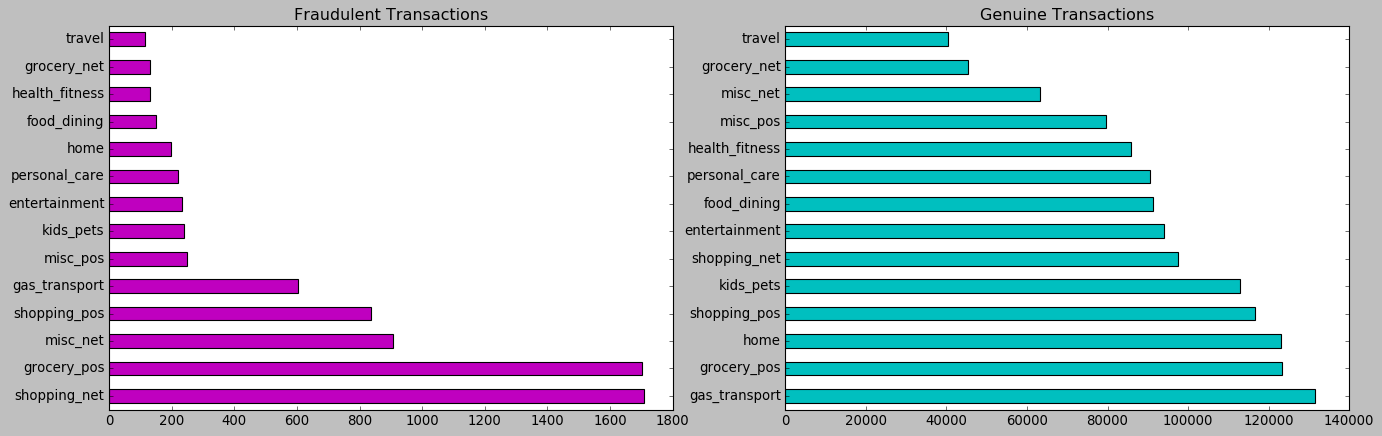

In [28]:
# Category
plt.figure(figsize= (20,6))
plt.subplot(121)
plt.title('Fraudulent Transactions')
fraud['category'].value_counts().plot.barh(color = 'm')

plt.subplot(122)
plt.title('Genuine Transactions')
train_df['category'].value_counts().plot.barh(color = 'c')
plt.show()

The top 5 categories under fraudulent transactions are:
1. grocery_pos
2. shopping_net
3. misc_net
4. shopping_pos
5. gas_transport

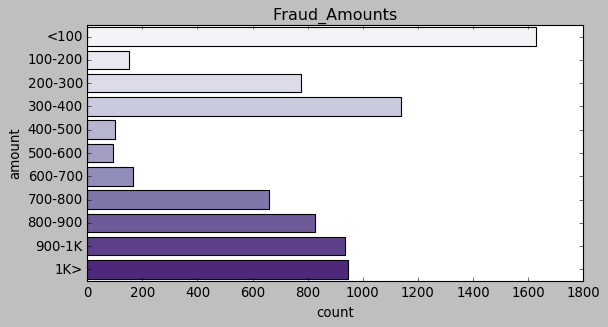

In [29]:
# Amount category
amt_labels = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', 
              '800-900', '900-1K', '1K>']
amt_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 20000]
fraud['amount'] = pd.cut(fraud['amt'], bins = amt_bins, labels = amt_labels)

plt.figure(figsize = (8,4))
plt.title('Fraud_Amounts')
sns.countplot(y = 'amount', data = fraud, palette = 'Purples')
plt.show()

The top 3 amount category of fraudulent transactions are:
1. <100
2. 300 to 400
3. 900 to 1k

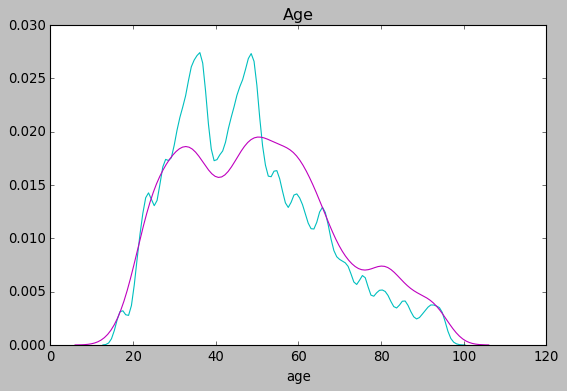

In [30]:
# Age
plt.figure(figsize = (8,5))
plt.subplot(111)
plt.title('Age')
sns.distplot(train_df['age'], hist = False, color = 'c')

plt.subplot(111)
sns.distplot(fraud['age'], hist = False, color = 'm')
plt.show()

Fraudsters are more likely to target 2 particular age groups:
1. Early 20's [22 to 30]
2. old age [50 to 65]

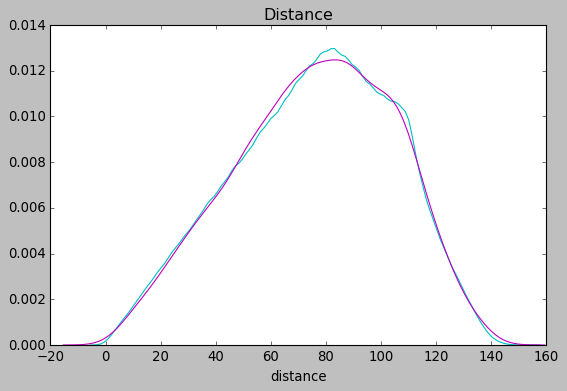

In [31]:
# Distance
plt.figure(figsize = (8,5))
plt.subplot(111)
plt.title('Distance')
sns.distplot(train_df['distance'], hist = False, color = 'c')

plt.subplot(111)
sns.distplot(fraud['distance'], hist = False, color = 'm')
plt.show()

Distance between customer's home and purchase made over merchant's location has no impact on the fraudlent transactions. However from this we can infer that the fraudsters are localite's.

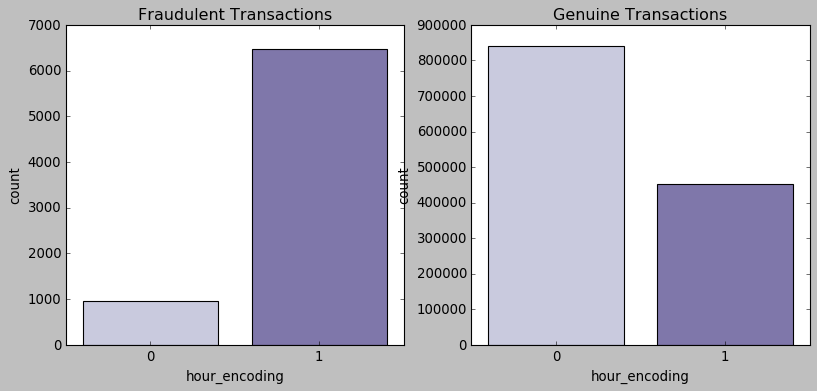

In [32]:
# Hour encoding
plt.figure(figsize= (12,5))
plt.subplot(121)
plt.title('Fraudulent Transactions')
sns.countplot(fraud['hour_encoding'], palette = 'Purples')

plt.subplot(122)
plt.title('Genuine Transactions')
sns.countplot(train_df['hour_encoding'], palette = 'Purples')
plt.show()

It is very evident that 90% of the fraudulent activities happen during abnormal hrs [21:00 to 5:00].

## Task 2: Preparing Data for Modeling

### Subtask 2.1: Dummy variables

In [33]:
# Converting categorial variables
cat = ['grocery_pos', 'shopping_net', 'misc_net', 'shopping_pos', 'gas_transport']
train_df['category'] = train_df['category'].map(lambda x: 'other' if x not in cat else x)
dummy = pd.get_dummies(train_df['category'])
dummy = dummy.drop('other', axis = 1)
train_df = pd.concat([train_df, dummy], axis = 1)
train_df = train_df.drop('category', axis = 1)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295113 entries, 43 to 1296674
Data columns (total 16 columns):
amt               1295113 non-null float64
gender            1295113 non-null int64
zip               1295113 non-null int64
city_pop          1295113 non-null int64
unix_time         1295113 non-null int64
is_fraud          1295113 non-null int64
age               1295113 non-null int64
distance          1295113 non-null int32
hour_encoding     1295113 non-null int64
time_diff         1295113 non-null int32
fraud_merchant    1295113 non-null int64
gas_transport     1295113 non-null uint8
grocery_pos       1295113 non-null uint8
misc_net          1295113 non-null uint8
shopping_net      1295113 non-null uint8
shopping_pos      1295113 non-null uint8
dtypes: float64(1), int32(2), int64(8), uint8(5)
memory usage: 114.9 MB


**Explanation**: created dummy variables for the column 'category' and selected only those attributes in which frauds happen more frequently. 

### Subtask 2.2: Transforming Test data

In [35]:
test = pd.read_csv('C:/demo/Credit_Card_Fraud/fraudTest.csv')

In [36]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
Unnamed: 0               555719 non-null int64
trans_date_trans_time    555719 non-null object
cc_num                   555719 non-null int64
merchant                 555719 non-null object
category                 555719 non-null object
amt                      555719 non-null float64
first                    555719 non-null object
last                     555719 non-null object
gender                   555719 non-null object
street                   555719 non-null object
city                     555719 non-null object
state                    555719 non-null object
zip                      555719 non-null int64
lat                      555719 non-null float64
long                     555719 non-null float64
city_pop                 555719 non-null int64
job                      555719 non-null object
dob                      555719 non-null object
trans_num                5

In [38]:
# Extracting age from DOB
test['dob'] = pd.to_datetime(test['dob'])
test['yob'] = test['dob'].dt.year
test['age'] = test['yob'].apply(lambda x: 2021-x)

In [39]:
# Calculating distance between merchant's location and card holder's home location
test['distance'] = test.apply(lambda x: geopy.distance.great_circle((x['lat'], x['long']),
                                                                (x['merch_lat'], x['merch_long'])).km, axis = 1)
test['distance'] = test['distance'].astype(int)

In [40]:
# Hour encoding: Normal hrs [05:00 to 21:00] vs abnormal hrs [21:00 to 5:00]
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['hour_encoding'] = test['trans_date_trans_time'].dt.hour.apply(lambda x: 0 if x > 5 and x < 21 else 1)

In [41]:
# Calculating time since last transaction made
test['time_diff'] = test.sort_values(by = 'trans_date_trans_time', ascending = False).groupby('cc_num')['unix_time'].diff(periods = -1)
test['time_diff'] = test['time_diff'].fillna(0).astype(int)
test = test.loc[test['time_diff']>0,:]

In [42]:
# Blacklisting merchants with whom there has been > 15 fraudulent transactions and encoding it as 1
test['fraud_merchant'] = test['merchant'].map(lambda x: 1 if x in fraud_merchant else 0)

In [43]:
# Encoding gender with 1 = Male and 0 = Female
test['gender'] = test['gender'].map(lambda x: 1 if x == 'M' else 0)

In [44]:
# Converting categorial variables
test['category'] = test['category'].map(lambda x: 'other' if x not in cat else x)
test_dummy = pd.get_dummies(test['category'])
test_dummy = test_dummy.drop('other', axis = 1)
test = pd.concat([test, test_dummy], axis = 1)
test = test.drop('category', axis = 1)

In [45]:
# Dropping unnecessary columns
test_df = test.drop(test[to_drop], axis = 1)

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554771 entries, 52 to 555718
Data columns (total 16 columns):
amt               554771 non-null float64
gender            554771 non-null int64
zip               554771 non-null int64
city_pop          554771 non-null int64
unix_time         554771 non-null int64
is_fraud          554771 non-null int64
age               554771 non-null int64
distance          554771 non-null int32
hour_encoding     554771 non-null int64
time_diff         554771 non-null int32
fraud_merchant    554771 non-null int64
gas_transport     554771 non-null uint8
grocery_pos       554771 non-null uint8
misc_net          554771 non-null uint8
shopping_net      554771 non-null uint8
shopping_pos      554771 non-null uint8
dtypes: float64(1), int32(2), int64(8), uint8(5)
memory usage: 49.2 MB


**Explanation**: The test data has been transformed according to train data to macth similar number and type of columns.

## Task 3: Building the Models

### Subtask 3.1: Logestic Regression

#### Subtask 3.1.1: Outliers

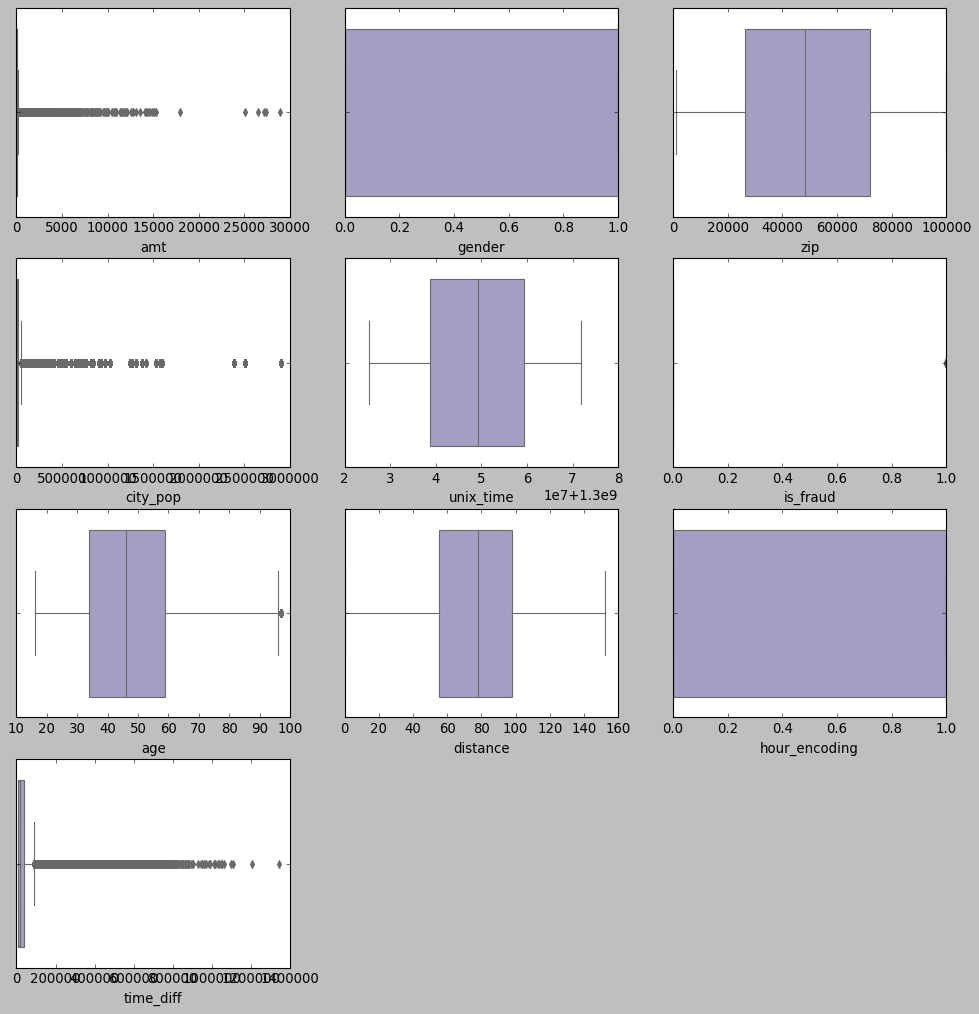

In [47]:
#  Plotting box plot to identify Outliers
remove = ['shopping_pos', 'gas_transport', 'grocery_pos', 'misc_net', 'shopping_net', 'fraud_merchant']
var = list(train_df[train_df.columns[~train_df.columns.isin(remove)]])

plt.figure(figsize = (15,15))
for x in enumerate(var):
  plt.subplot(4,3,x[0]+1)
  sns.boxplot(x[1], data = train_df, palette= 'Purples')
plt.show()

In [48]:
# Creating a data set for logestic regression model
log = train_df

In [49]:
log['amt'].describe([0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).round(2)

count    1295113.00
mean          70.33
std          160.33
min            1.00
25%            9.65
50%           47.51
75%           83.13
90%          136.65
95%          196.24
99%          545.52
max        28948.90
Name: amt, dtype: float64

In [50]:
# Ensuring we dont loose target variable (is_fraud = 1)
log.loc[log['amt'] > 1450]['is_fraud'].value_counts()

0    1399
Name: is_fraud, dtype: int64

In [51]:
# Trimming rows which have outliers
log = log.loc[log['amt']<= 1450, :]
log.shape

(1293714, 16)

In [52]:
# City pop
log['city_pop'].describe([0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).round()

count    1293714.0
mean       88797.0
std       301907.0
min           23.0
25%          743.0
50%         2456.0
75%        20328.0
90%       186140.0
95%       525713.0
99%      1577385.0
max      2906700.0
Name: city_pop, dtype: float64

In [53]:
# Binning city population
city_label = ['low_pop', 'medium_pop', 'hight_pop']
city_bins = [0, 1500, 4000, 2906700]
log['city_pops'] = pd.cut(log['city_pop'], labels = city_label, bins = city_bins)
log = log.drop('city_pop', axis = 1)

In [54]:
# Creating dummy variable for the column 'city_pops'
city_dummy = pd.get_dummies(log['city_pops'], drop_first = True)
log = pd.concat([log, city_dummy], axis = 1)
log = log.drop('city_pops', axis = 1)

In [55]:
log['time_diff'].describe([0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).round()

count    1293714.0
mean       32534.0
std        47412.0
min            1.0
25%         6022.0
50%        16589.0
75%        40305.0
90%        78335.0
95%       114254.0
99%       232676.0
max      1341471.0
Name: time_diff, dtype: float64

In [56]:
# Capping time_diff to 95th percentile
log.loc[log['time_diff']> log['time_diff'].quantile(0.95), ['time_diff']] = log['time_diff'].quantile(0.95)

**Explanation**: Logestic Regression is very sensitive to outliers, hence it is mandatory to treat outliers before proceeding with building the model.

#### Subtask 3.1.2: Train and Validation set

In [57]:
df_train, df_val = train_test_split(log, train_size = 0.80, random_state = 100)
print(df_train.shape)
print(df_val.shape)

(1034971, 17)
(258743, 17)


#### Subtask 3.1.3: Variable Scalling

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034971 entries, 1217146 to 1107395
Data columns (total 17 columns):
amt               1034971 non-null float64
gender            1034971 non-null int64
zip               1034971 non-null int64
unix_time         1034971 non-null int64
is_fraud          1034971 non-null int64
age               1034971 non-null int64
distance          1034971 non-null int32
hour_encoding     1034971 non-null int64
time_diff         1034971 non-null float64
fraud_merchant    1034971 non-null int64
gas_transport     1034971 non-null uint8
grocery_pos       1034971 non-null uint8
misc_net          1034971 non-null uint8
shopping_net      1034971 non-null uint8
shopping_pos      1034971 non-null uint8
medium_pop        1034971 non-null uint8
hight_pop         1034971 non-null uint8
dtypes: float64(2), int32(1), int64(7), uint8(7)
memory usage: 89.8 MB


In [59]:
# Instantiating MinMaxScaller and fit.tranforming df_train
vars = ['amt', 'gender', 'zip', 'unix_time', 'age', 'distance', 'time_diff']
scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])
df_train.describe().round(3)

,amt,gender,zip,unix_time,is_fraud,age,distance,hour_encoding,time_diff,fraud_merchant,gas_transport,grocery_pos,misc_net,shopping_net,shopping_pos,medium_pop,hight_pop
count,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000,1034971.000
mean,0.046,0.453,0.483,0.515,0.006,0.392,0.498,0.351,0.252,0.285,0.102,0.096,0.049,0.075,0.090,0.188,0.431
std,0.069,0.498,0.273,0.276,0.075,0.214,0.192,0.477,0.273,0.452,0.302,0.294,0.215,0.264,0.286,0.390,0.495
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.006,0.000,0.254,0.289,0.000,0.222,0.362,0.000,0.053,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.032,0.000,0.476,0.515,0.000,0.370,0.513,0.000,0.145,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.057,1.000,0.718,0.733,0.000,0.531,0.645,1.000,0.353,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**Explanation**: Varibales are scaled using MinMaxScaler. Since the variables were in different unit, scaling was necessary for better interpretation of results. Also it helps in faster computation.

#### Subtask 3.1.4: Correlation and Heat map

In [60]:
df_train.corr()

,amt,gender,zip,unix_time,is_fraud,age,distance,hour_encoding,time_diff,fraud_merchant,gas_transport,grocery_pos,misc_net,shopping_net,shopping_pos,medium_pop,hight_pop
amt,1.000000,0.001531,0.002639,-0.000723,0.350175,-0.014295,-0.000244,0.049604,-0.003557,0.137740,-0.012690,0.160224,0.026851,0.035200,0.007561,-0.007729,0.012035
gender,0.001531,1.000000,-0.065661,-0.001342,0.007177,0.004441,-0.002657,0.011602,0.065040,-0.010673,-0.002792,0.012416,-0.006965,-0.012018,-0.022240,-0.005976,0.029010
zip,0.002639,-0.065661,1.000000,0.000313,-0.002738,0.011660,0.006521,-0.004940,-0.007130,0.003766,-0.000036,-0.001576,0.002865,0.005911,0.000479,-0.074911,-0.023684
unix_time,-0.000723,-0.001342,0.000313,1.000000,-0.004500,-0.003609,-0.001083,0.001487,-0.037707,0.000178,-0.000207,0.000642,0.000381,-0.000118,0.000323,-0.001002,-0.001612
is_fraud,0.350175,0.007177,-0.002738,-0.004500,1.000000,0.011254,0.001445,0.083300,-0.020733,0.063933,-0.005436,0.034737,0.025190,0.044630,0.005940,-0.003082,0.001688
age,-0.014295,0.004441,0.011660,-0.003609,0.011254,1.000000,-0.004737,0.053362,0.113250,-0.001415,0.038058,0.017900,0.002405,-0.016540,-0.017382,-0.010994,-0.140768
distance,-0.000244,-0.002657,0.006521,-0.001083,0.001445,-0.004737,1.000000,0.001231,0.001218,0.001259,-0.000519,0.000787,-0.000627,0.001142,0.000371,0.000278,0.017876
hour_encoding,0.049604,0.011602,-0.004940,0.001487,0.083300,0.053362,0.001231,1.000000,-0.013049,0.098534,0.106427,0.102758,0.051488,0.008554,-0.001090,-0.001926,-0.007653
time_diff,-0.003557,0.065040,-0.007130,-0.037707,-0.020733,0.113250,0.001218,-0.013049,1.000000,0.002066,0.021651,0.019729,0.000408,-0.013630,-0.009549,0.006006,-0.000260
fraud_merchant,0.137740,-0.010673,0.003766,0.000178,0.063933,-0.001415,0.001259,0.098534,0.002066,1.000000,-0.123738,0.514359,0.248671,0.451516,0.259835,-0.001885,0.001640


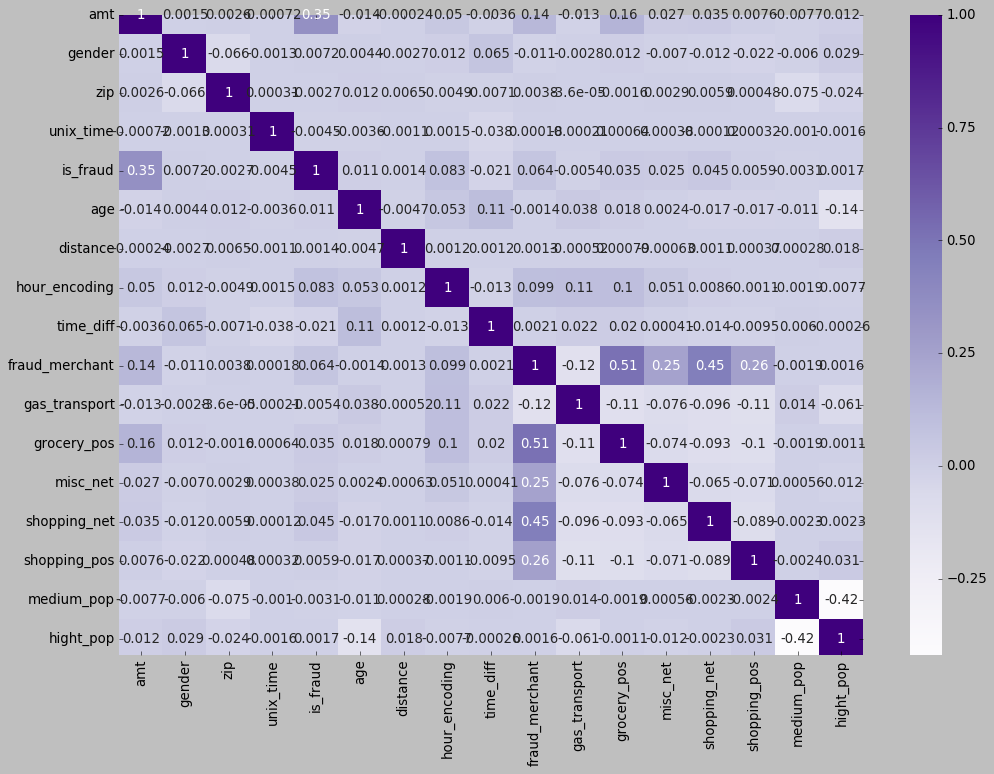

In [61]:
plt.figure(figsize = (15,10))
heat = sns.heatmap(df_train.corr(), annot = True, cmap = 'Purples')
bottom, top = heat.get_ylim()
heat.set_ylim(bottom+0.4, top+0)
plt.show()

**Explanation**: There are a few columns in the data set which has multicolinearity. However this variable will be removed in later stages of model building. The variable 'amt' has high correlation with the target variable.

#### Subtask 3.1.5: Class Imbalance

In [86]:
df_train['is_fraud'].value_counts(normalize = True)

0    0.994276
1    0.005724
Name: is_fraud, dtype: float64

In [87]:
# Assigning X and Y
Y = df_train['is_fraud']
X = df_train.drop('is_fraud', axis = 1)

In [89]:
# Instantiating SMOTE and generating syntetic data points
smote = SMOTE(random_state = 42, k_neighbors= 5, n_jobs = -1)
X_train, Y_train = smote.fit_resample(X, Y)

In [90]:
# Assigning X column names back.
X_train = pd.DataFrame(X_train, columns = X.columns)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058094 entries, 0 to 2058093
Data columns (total 16 columns):
amt               float64
gender            float64
zip               float64
unix_time         float64
age               float64
distance          float64
hour_encoding     float64
time_diff         float64
fraud_merchant    float64
gas_transport     float64
grocery_pos       float64
misc_net          float64
shopping_net      float64
shopping_pos      float64
medium_pop        float64
hight_pop         float64
dtypes: float64(16)
memory usage: 251.2 MB
None


In [91]:
# Assigning Y column name
Y = pd.DataFrame(Y)
Y_train = pd.DataFrame(Y_train, columns = Y.columns)
print(Y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058094 entries, 0 to 2058093
Data columns (total 1 columns):
is_fraud    int64
dtypes: int64(1)
memory usage: 15.7 MB
None


**Explanation**: The data set had very high imbalance class of 99:1. It is mandatory to fix the imbalance ratio, so that the model can learn efficiently.Hence SMOTE method was used to generate synthetic data points to fix the imbalance class.

#### Subtask 3.1.6: Training the model

In [92]:
# Instantiating Logistic Regression model
log_reg = LogisticRegression()

In [94]:
# Using RFE to get top 10 features
rfe = RFE(log_reg, 10)
rfe_model = rfe.fit(X_train, Y_train)

In [95]:
# Ranking variables based on selection
pd.DataFrame(zip(X_train.columns, rfe_model.ranking_)).sort_values(by = 1, ascending = True)

,0,1
0,amt,1
3,unix_time,1
6,hour_encoding,1
7,time_diff,1
8,fraud_merchant,1
9,gas_transport,1
10,grocery_pos,1
11,misc_net,1
12,shopping_net,1
13,shopping_pos,1


In [96]:
col = X_train.columns[rfe_model.support_]
col

Index(['amt', 'unix_time', 'hour_encoding', 'time_diff', 'fraud_merchant',
       'gas_transport', 'grocery_pos', 'misc_net', 'shopping_net',
       'shopping_pos'],
      dtype='object')

Assumptions made on the model:
1. Assuming alpha to be 0.05 with 95% of confidence interval.
  - H0: The variable is >= 0.05 and is insignificant in determining fraud.
  - H1: The variable is < 0.05 and is significant in determining fraud.
2. Assuming permitable VIF level to be <5.

In [98]:
# Building the model using Statsmodel to optimize the model
X_train_sm = sm.add_constant(X_train[col])
log_model_1 = sm.GLM(Y_train, X_train_sm, families = sm.families.Binomial()).fit()

In [99]:
print(log_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:              2058094
Model:                            GLM   Df Residuals:                  2058083
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.10427
Method:                          IRLS   Log-Likelihood:            -5.9387e+05
Date:                Sat, 13 Feb 2021   Deviance:                   2.1460e+05
Time:                        06:18:16   Pearson chi2:                 2.15e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0991      0.001    156.

In [100]:
# Checking for multicolinearity
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, x) for x in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,fraud_merchant,10.37
8,shopping_net,5.57
6,grocery_pos,4.90
0,amt,3.94
7,misc_net,2.73
2,hour_encoding,2.71
9,shopping_pos,2.54
1,unix_time,2.44
3,time_diff,1.45
5,gas_transport,1.24


In [101]:
# Dropping column 'shopping_net' and building the model again
X_2 = X_train[col].drop('shopping_net', axis = 1)
X_2_sm = sm.add_constant(X_2)
log_model_2 = sm.GLM(Y_train, X_2_sm, families = sm.families.Binomial()).fit()
print(log_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:              2058094
Model:                            GLM   Df Residuals:                  2058084
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.10707
Method:                          IRLS   Log-Likelihood:            -6.2109e+05
Date:                Sat, 13 Feb 2021   Deviance:                   2.2035e+05
Time:                        06:19:49   Pearson chi2:                 2.20e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0851      0.001    133.

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, x) for x in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,fraud_merchant,4.66
0,amt,3.26
2,hour_encoding,2.71
1,unix_time,2.43
6,grocery_pos,2.22
3,time_diff,1.45
7,misc_net,1.32
8,shopping_pos,1.29
5,gas_transport,1.20


**Explanation**: log_model_2 is the final model as the p value is < 0.05, which makes all the variables significant in determining fraudulent transactions. Also for this model the VIF score for all the variables are below the permitable range of < 5, which means that there is no multicolinearity between the independent variables. 

#### Subtask 3.1.7: Model Evaluation

In [103]:
# Making prediction on Train data
Y_train_pred = log_model_2.predict(X_2_sm)

In [104]:
# conversions at different probability scores
cutoff = pd.DataFrame()
cutoff['Actual'] = Y_train.values.flatten()
cutoff['Pred'] = Y_train_pred.values
num = [float(x/10) for x in range(10)]
for x in num:
  cutoff[x] = cutoff['Pred'].map(lambda i: 1 if i > x else 0)
cutoff.head()

,Actual,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.057675,1,0,0,0,0,0,0,0,0,0
1,0,0.057945,1,0,0,0,0,0,0,0,0,0
2,0,0.134614,1,1,0,0,0,0,0,0,0,0
3,0,0.045300,1,0,0,0,0,0,0,0,0,0
4,0,0.118429,1,1,0,0,0,0,0,0,0,0


In [105]:
# Calculating various measures.
measures = pd.DataFrame(columns = ['Prob', 'Accuracy', 'Sensitivity', 'FPR', 'Specificity', 'FNR'])
for x in num: 
  metrix = metrics.confusion_matrix(cutoff['Actual'], cutoff[x])
  total = sum(sum(metrix))
  Accuracy = (metrix[0,0]+metrix[1,1])/total
  Sensitivity = metrix[1,1]/(metrix[1,1]+metrix[1,0])
  FPR = metrix[0,1]/(metrix[0,1]+metrix[0,0])
  Specificity = metrix[0,0]/(metrix[0,0]+metrix[0,1])
  FNR = metrix[1,0]/(metrix[1,0]+metrix[1,1])
  measures.loc[x] = [x, Accuracy, Sensitivity, FPR, Specificity, FNR]

In [106]:
measures

,Prob,Accuracy,Sensitivity,FPR,Specificity,FNR
0.0,0.0,0.555662,0.999528,0.888204,0.111796,0.000472
0.1,0.1,0.692185,0.981564,0.597194,0.402806,0.018436
0.2,0.2,0.763321,0.975957,0.449316,0.550684,0.024043
0.3,0.3,0.814750,0.967374,0.337874,0.662126,0.032626
0.4,0.4,0.840999,0.891369,0.209372,0.790628,0.108631
0.5,0.5,0.844722,0.798999,0.109555,0.890445,0.201001
0.6,0.6,0.819320,0.696587,0.057947,0.942053,0.303413
0.7,0.7,0.827113,0.666890,0.012663,0.987337,0.333110
0.8,0.8,0.801991,0.607051,0.003069,0.996931,0.392949
0.9,0.9,0.684584,0.370903,0.001736,0.998264,0.629097


<Figure size 576x360 with 0 Axes>

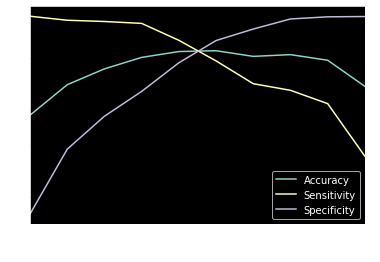

In [107]:
# Finding the Optimal Threshold Point
plt.figure(figsize = (8, 5))
measures.plot.line(x = 'Prob', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

**Explanation**: The Optimal Thrushold limit is a point where 'Accuracy', 'Sensitivity' and 'Specificity are fairly decent and are almost equal. It is usually the intersection point on the graph. Hence the optimal thrushold limit is 0.45.

In [108]:
# ROC curve 
def roc (actual, prob):
    FPR, TPR, threshold = metrics.roc_curve(actual, prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, prob)
    plt.plot(FPR, TPR, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.show()
    return None

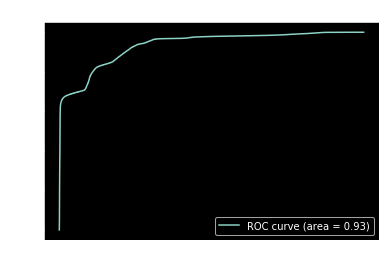

In [109]:
FPR, TPR, threshold = metrics.roc_curve(cutoff['Actual'], cutoff['Pred'], drop_intermediate = False)
roc(cutoff['Actual'], cutoff['Pred'])

**Explanation**: The model has achieved the ROC score of 0.93 which is pretty high and also from the above graph we can observe that the curve is hugging the TPR. This means that the model is able to identify fraudulent transactions correctly by reducing the FPR.

**Logestic Regression**: Even though the optimal threshold limit was identified at 0.5 we cannot go ahead with this cut off point as it was only able to reach the accuracy and sensitivity of 84% and 79% respectively. According to the problem statement, we need to correctly identify fraudulent transactions inorder to reduce the loss from frauds. Hence factors like accuracy, sensitivity and FNR plays atmost importance. Keeping all this factors into consideration, the cut off limit is set at 0.4 at which the model is able to produce the following scores. (Best results)

In [110]:
measures.loc[measures['Prob'] == 0.4].round(2)

,Prob,Accuracy,Sensitivity,FPR,Specificity,FNR
0.4,0.4,0.84,0.89,0.21,0.79,0.11


#### Subtask 3.1.8: Evaluation on Validation set

In [111]:
# Rescalling variables
df_val[vars] = scaler.transform(df_val[vars])

In [112]:
# Assigning X and Y
Y_val = df_val['is_fraud']
X_val = df_val.drop('is_fraud', axis = 1)
X_val = X_val[X_2.columns]

In [113]:
# Prediction and evaluation
X_val_sm = sm.add_constant(X_val)
Y_val_pred = log_model_2.predict(X_val_sm)

In [114]:
# Validation results
validation = pd.DataFrame()
validation['Actual'] = Y_val.values
validation['Pred'] = Y_val_pred.values
validation['Final'] = validation['Pred'].map(lambda x: 1 if x >= 0.4 else 0)
validation.head()

,Actual,Pred,Final
0,0,0.389076,0
1,0,0.072918,0
2,0,0.395366,0
3,0,0.091756,0
4,0,0.445571,1


In [115]:
# Defining Evaluation Metrics
def evaluate(x):
  confusion = metrics.confusion_matrix(x['Actual'], x['Final'])
  Sensitivity = confusion[1,1]/(confusion[1,1]+confusion[1,0])
  Specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
  FNR = confusion[1,0]/(confusion[1,0]+confusion[1,1])

  print('Evaluation Metrics')
  print({'Accuracy': round(metrics.accuracy_score(x['Actual'], x['Final']), 2)})
  print({'Sensitivity': round(Sensitivity, 2)})
  print({'Specificity': round(Specificity, 2)})
  print({'FNR': round(FNR, 2)})
  print('-'*50)
  print('Confusion Metrics')
  print(confusion)

In [116]:
# Evaluating on validation set
evaluate(validation)

Evaluation Metrics
{'Accuracy': 0.79}
{'Sensitivity': 0.89}
{'Specificity': 0.79}
{'FNR': 0.11}
--------------------------------------------------
Confusion Metrics
[[203518  53727]
 [   162   1336]]


**Explanation**: The model is performing extreemly well on the validation set as well. The results are almost similar to the training data. This indicates that the model has generalized on the data set and is able to make correct predictions.

#### Subtask 3.1.9: Evaluation on Test data

In [117]:
log_test = test_df

In [118]:
log_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554771 entries, 52 to 555718
Data columns (total 16 columns):
amt               554771 non-null float64
gender            554771 non-null int64
zip               554771 non-null int64
city_pop          554771 non-null int64
unix_time         554771 non-null int64
is_fraud          554771 non-null int64
age               554771 non-null int64
distance          554771 non-null int32
hour_encoding     554771 non-null int64
time_diff         554771 non-null int32
fraud_merchant    554771 non-null int64
gas_transport     554771 non-null uint8
grocery_pos       554771 non-null uint8
misc_net          554771 non-null uint8
shopping_net      554771 non-null uint8
shopping_pos      554771 non-null uint8
dtypes: float64(1), int32(2), int64(8), uint8(5)
memory usage: 49.2 MB


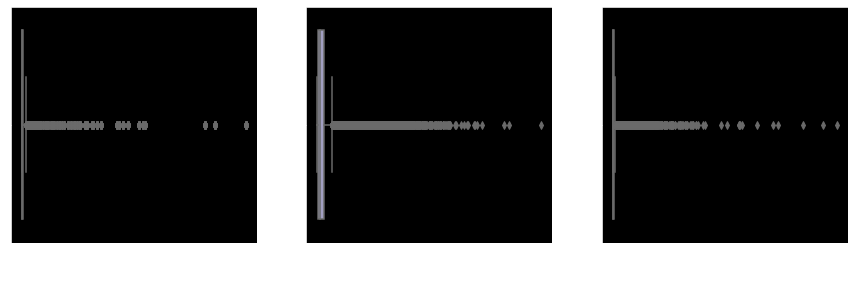

In [124]:
# Checking for outliers
out = ['city_pop', 'time_diff', 'amt']
plt.figure(figsize = (15,20))
for x in enumerate(out):
  plt.subplot(4,3,x[0]+1)
  sns.boxplot(x[1], data = log_test, palette= 'Purples')
plt.show()

In [125]:
# outliers treatment
log_test['city_pops'] = pd.cut(log_test['city_pop'], labels = city_label, bins = city_bins)
log_test = log_test.drop('city_pop', axis = 1)
log_test = log_test.loc[log_test['amt']<= 1450, :]
log_test.loc[log_test['time_diff']> log_test['time_diff'].quantile(0.95), ['time_diff']] = log_test['time_diff'].quantile(0.95)

In [126]:
# Rescaling variables
log_test[vars] = scaler.transform(log_test[vars])

In [127]:
# Assigning X and Y
Y_test = log_test['is_fraud']
X_test = log_test.drop('is_fraud', axis = 1)
X_test = X_test[X_2.columns]

In [128]:
# Prediction and evaluation
X_test_sm = sm.add_constant(X_test)
Y_test_pred = log_model_2.predict(X_test_sm)

In [129]:
# Test results
LR = pd.DataFrame()
LR['Actual'] = Y_test.values
LR['Pred'] = Y_test_pred.values
LR['Final'] = LR['Pred'].map(lambda x: 1 if x >= 0.4 else 0)
LR.head()

,Actual,Pred,Final
0,0,0.114481,0
1,0,0.046402,0
2,0,0.204402,0
3,0,0.061558,0
4,0,0.157752,0


In [130]:
# Evaluating on the test data
evaluate(LR)

Evaluation Metrics
{'Accuracy': 0.83}
{'Sensitivity': 0.83}
{'Specificity': 0.83}
{'FNR': 0.17}
--------------------------------------------------
Confusion Metrics
[[460899  91095]
 [   367   1758]]


**Explanation**: Logestic Regression model is performing good on the test data as well. All the evaluation metrics are within the permitable range. The model is performing well and is making correct predictions on the unseen test data. However there can be still scope of improvements on the metrics like sensitivity, FNR, TPR etc. This can be achieved using tree models.

### Subtask 3.2: Decision Tree

#### Subtask 3.2.1: Class Imbalance

In [131]:
# Checking train df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295113 entries, 43 to 1296674
Data columns (total 16 columns):
amt               1295113 non-null float64
gender            1295113 non-null int64
zip               1295113 non-null int64
city_pop          1295113 non-null int64
unix_time         1295113 non-null int64
is_fraud          1295113 non-null int64
age               1295113 non-null int64
distance          1295113 non-null int32
hour_encoding     1295113 non-null int64
time_diff         1295113 non-null int32
fraud_merchant    1295113 non-null int64
gas_transport     1295113 non-null uint8
grocery_pos       1295113 non-null uint8
misc_net          1295113 non-null uint8
shopping_net      1295113 non-null uint8
shopping_pos      1295113 non-null uint8
dtypes: float64(1), int32(2), int64(8), uint8(5)
memory usage: 114.9 MB


In [132]:
# Checking imbalance %
train_df['is_fraud'].value_counts(normalize = True).round(3)

0    0.994
1    0.006
Name: is_fraud, dtype: float64

In [133]:
# Assigning X and Y
Y = train_df['is_fraud']
X = train_df.drop('is_fraud', axis = 1)

In [134]:
# Generating synthetic data points using smote
X_train, Y_train = smote.fit_resample(X, Y)

In [135]:
# Assigning X columns back
X_train = pd.DataFrame(X_train, columns = X.columns)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575382 entries, 0 to 2575381
Data columns (total 15 columns):
amt               float64
gender            float64
zip               float64
city_pop          float64
unix_time         float64
age               float64
distance          float64
hour_encoding     float64
time_diff         float64
fraud_merchant    float64
gas_transport     float64
grocery_pos       float64
misc_net          float64
shopping_net      float64
shopping_pos      float64
dtypes: float64(15)
memory usage: 294.7 MB


In [150]:
# Assigning Y column name
Y = pd.DataFrame(Y)
Y_train = pd.DataFrame(Y_train, columns = Y.columns)
print(Y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575382 entries, 0 to 2575381
Data columns (total 1 columns):
is_fraud    int64
dtypes: int64(1)
memory usage: 19.6 MB
None


**Explanation**: The data set had very high imbalance class of 99:1. It is mandatory to fix the imbalance ratio, so that the model can learn efficiently.Hence SMOTE method was used to generate synthetic data points to fix the imbalance class.

#### Subtask 3.2.2: Hyperparameter Tuning

In [136]:
# Defining graph for plotting
def graph(x):
  plt.figure(figsize = (60,30))
  plot_tree(x, feature_names = X.columns, class_names = ['Not Fraud', 'Fraud'], filled = True)
  plt.show()

In [137]:
# Instantiating DescisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

In [138]:
# Selecting the parameters for Hyperparameter Tuning
params = {'max_depth' : [4,5,6,7,8], 'min_samples_leaf': [10,20,30,40,100,500], 
          'min_samples_split': [10,20,30,40,50]}

In [139]:
# Instantiating GridSearchCV
grid = GridSearchCV(estimator = dt, param_grid = params, cv = 4, n_jobs = -1, verbose = 1, 
                    scoring= 'balanced_accuracy')

In [141]:
# Estimating best decision tree
%time
grid.fit(X_train, Y_train)

Wall time: 0 ns
Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 110.9min finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [10, 20, 30, 40, 100, 500],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='balanced_accuracy', verbose=1)

In [173]:
# Identifying the best decision tree
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10,
                       random_state=42)


**Explanation**: Hyperparameter tuning is vital for any tree models. It not only avoids overfitting but also evaluates the model with the given parameters and gives the best parameters for the tree. In the above example, After 600 fits the model has selected the best parameters which gives the balanced_accuracy score of 0.73.

#### Subtask 3.2.3: Evaluation of Decision Tree

In [165]:
# predicting using best decision tree
dt_model = grid.best_estimator_
Y_train_pred = dt_model.predict_proba(X_train)
Y_train_pred = pd.DataFrame(Y_train_pred)
Y_train_pred = Y_train_pred[1]

In [167]:
# conversions at different probability scores
cutoff = pd.DataFrame()
cutoff['Actual'] = Y_train.values.flatten()
cutoff['Pred'] = Y_train_pred.values
num = [float(x/10) for x in range(10)]
for x in num:
  cutoff[x] = cutoff['Pred'].map(lambda i: 1 if i > x else 0)
cutoff.head()

,Actual,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000000,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,0,0,0,0,0,0,0,0,0
2,0,0.315464,1,1,1,1,0,0,0,0,0,0
3,0,0.000000,0,0,0,0,0,0,0,0,0,0
4,0,0.315464,1,1,1,1,0,0,0,0,0,0


In [169]:
# Calculating various measures
measures = pd.DataFrame(columns = ['Prob', 'Accuracy', 'Sensitivity', 'FPR', 'Specificity', 'FNR'])
for x in num: 
  metrix = metrics.confusion_matrix(cutoff['Actual'], cutoff[x])
  total = sum(sum(metrix))
  Accuracy = (metrix[0,0]+metrix[1,1])/total
  Sensitivity = metrix[1,1]/(metrix[1,1]+metrix[1,0])
  FPR = metrix[0,1]/(metrix[0,1]+metrix[0,0])
  Specificity = metrix[0,0]/(metrix[0,0]+metrix[0,1])
  FNR = metrix[1,0]/(metrix[1,0]+metrix[1,1])
  measures.loc[x] = [x, Accuracy, Sensitivity, FPR, Specificity, FNR]

In [170]:
measures

,Prob,Accuracy,Sensitivity,FPR,Specificity,FNR
0.0,0.0,0.564057,1.000000,0.871887,0.128113,0.000000
0.1,0.1,0.933883,0.995669,0.127903,0.872097,0.004331
0.2,0.2,0.961552,0.981873,0.058770,0.941230,0.018127
0.3,0.3,0.961582,0.981840,0.058677,0.941323,0.018160
0.4,0.4,0.972263,0.963368,0.018842,0.981158,0.036632
0.5,0.5,0.972424,0.961424,0.016576,0.983424,0.038576
0.6,0.6,0.972422,0.961415,0.016570,0.983430,0.038585
0.7,0.7,0.967326,0.940799,0.006147,0.993853,0.059201
0.8,0.8,0.965402,0.935307,0.004504,0.995496,0.064693
0.9,0.9,0.964752,0.933824,0.004320,0.995680,0.066176


<Figure size 576x360 with 0 Axes>

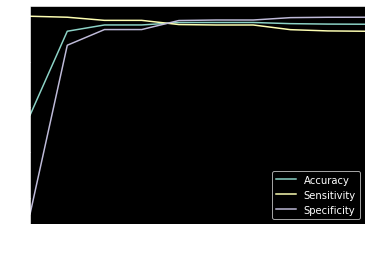

In [171]:
# Finding the Optimal Threshold Point
plt.figure(figsize = (8, 5))
measures.plot.line(x = 'Prob', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

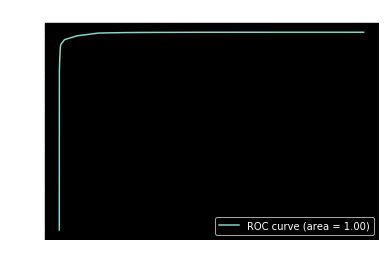

In [179]:
# ROC curve
FPR, TPR, threshold = metrics.roc_curve(cutoff['Actual'], cutoff['Pred'], drop_intermediate = False)
roc(cutoff['Actual'], cutoff['Pred'])

**Explanation**: The model has achieved the ROC score of 1.00 which is the highest and also from the above graph we can observe that the curve is hugging the TPR. This means that the model is able to identify fraudulent transactions correctly by reducing the FPR.

**Explanation**: Even though the optimal threshold limit was identified at 0.4 we cannot go ahead with this cut off point as the model was able to reach the accuracy and sensitivity of 97% and 96% respectively. According to the problem statement, we need to correctly identify fraudulent transactions inorder to reduce the loss from frauds. Hence factors like accuracy, sensitivity and FNR plays atmost importance. Keeping all this factors into consideration, the cut off limit is set at 0.3 at which the model is able to produce the best results by focusing more on sensitivity.

In [174]:
measures.loc[measures['Prob'] == 0.3].round(2)

,Prob,Accuracy,Sensitivity,FPR,Specificity,FNR
0.3,0.3,0.96,0.98,0.06,0.94,0.02


#### Subatsk 3.2.4: Evaluation on Test data

In [175]:
# Assigning X and Y
Y_test = test_df['is_fraud']
X_test = test_df.drop(['is_fraud', 'city_pops'], axis = 1)

In [176]:
# Prediction and evaluation
Y_test_pred = dt_model.predict_proba(X_test)
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred = Y_test_pred[1]

In [177]:
# Test results
DT = pd.DataFrame()
DT['Actual'] = Y_test.values
DT['Pred'] = Y_test_pred.values
DT['Final'] = DT['Pred'].map(lambda x: 1 if x >= 0.3 else 0)
DT.head()

,Actual,Pred,Final
0,0,0.004809,0
1,0,0.000020,0
2,0,0.000000,0
3,0,0.033022,0
4,0,0.000986,0


In [178]:
# evaluating on the test data
evaluate(DT)

Evaluation Metrics
{'Accuracy': 0.93}
{'Sensitivity': 0.88}
{'Specificity': 0.93}
{'FNR': 0.12}
--------------------------------------------------
Confusion Metrics
[[516397  36249]
 [   248   1877]]


**Decision Tree** model is performing good on the test data as well. All the evaluation metrics are within the permitable range. The model is performing well and is making correct predictions on the unseen test data. Decision Tree has out-performed Logestic Regression model by predicting the fraudulent transactions accurately.

### Subtask 3.3: Random Forest

#### Subtask 3.3.1: Hyperparameter Tuning using CV

In [180]:
# Checking X_train 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575382 entries, 0 to 2575381
Data columns (total 15 columns):
amt               float64
gender            float64
zip               float64
city_pop          float64
unix_time         float64
age               float64
distance          float64
hour_encoding     float64
time_diff         float64
fraud_merchant    float64
gas_transport     float64
grocery_pos       float64
misc_net          float64
shopping_net      float64
shopping_pos      float64
dtypes: float64(15)
memory usage: 294.7 MB


In [182]:
# Instantiating RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [183]:
# Selecting the parameters for Hyperparameter Tuning
para = {'max_depth': [4,6,8], 'min_samples_leaf': [20,40,100], 'max_features': [3,4], 
        'n_estimators': [20,40,80]}

In [184]:
# Initiating Grid Search
grid_search = GridSearchCV(estimator= rf, param_grid= para, cv= 4, n_jobs= -1, verbose= 1, 
                           scoring = 'balanced_accuracy')

In [186]:
# Finding the best Random Forest
%time
grid_search.fit(X_train, Y_train)

Wall time: 0 ns
Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 294.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 348.5min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'max_features': [3, 4],
                         'min_samples_leaf': [20, 40, 100],
                         'n_estimators': [20, 40, 80]},
             scoring='balanced_accuracy', verbose=1)

In [188]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=20,
                       n_estimators=80, random_state=42)


**Explanation**: Hyperparameter tuning is vital for any tree models. It not only avoids overfitting but also evaluates the model with the given parameters and gives the best parameters for the tree. In the above example, After 216 fits the model has selected the best parameters which gives the balanced_accuracy score of 0.73.

#### Subtask 3.3.2: Evaluation of Random Forest

In [193]:
# predicting using best Random Forest
rf_model = grid_search.best_estimator_
Y_train_pred = rf_model.predict_proba(X_train)
Y_train_pred = pd.DataFrame(Y_train_pred)
Y_train_pred = Y_train_pred[1]

In [195]:
# conversions at different probability scores
cutoff = pd.DataFrame()
cutoff['Actual'] = Y_train.values.flatten()
cutoff['Pred'] = Y_train_pred.values
num = [float(x/10) for x in range(10)]
for x in num:
  cutoff[x] = cutoff['Pred'].map(lambda i: 1 if i > x else 0)
cutoff.head()

,Actual,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.253089,1,1,1,0,0,0,0,0,0,0
1,0,0.374332,1,1,1,1,0,0,0,0,0,0
2,0,0.239938,1,1,1,0,0,0,0,0,0,0
3,0,0.096680,1,0,0,0,0,0,0,0,0,0
4,0,0.247585,1,1,1,0,0,0,0,0,0,0


In [196]:
# Calculating various measures
measures = pd.DataFrame(columns = ['Prob', 'Accuracy', 'Sensitivity', 'FPR', 'Specificity', 'FNR'])
for x in num: 
  metrix = metrics.confusion_matrix(cutoff['Actual'], cutoff[x])
  total = sum(sum(metrix))
  Accuracy = (metrix[0,0]+metrix[1,1])/total
  Sensitivity = metrix[1,1]/(metrix[1,1]+metrix[1,0])
  FPR = metrix[0,1]/(metrix[0,1]+metrix[0,0])
  Specificity = metrix[0,0]/(metrix[0,0]+metrix[0,1])
  FNR = metrix[1,0]/(metrix[1,0]+metrix[1,1])
  measures.loc[x] = [x, Accuracy, Sensitivity, FPR, Specificity, FNR]

In [197]:
measures

,Prob,Accuracy,Sensitivity,FPR,Specificity,FNR
0.0,0.0,0.500000,1.000000,1.000000,0.000000,0.000000
0.1,0.1,0.852756,0.998262,0.292750,0.707250,0.001738
0.2,0.2,0.943448,0.995555,0.108658,0.891342,0.004445
0.3,0.3,0.974382,0.984905,0.036140,0.963860,0.015095
0.4,0.4,0.978290,0.976948,0.020367,0.979633,0.023052
0.5,0.5,0.974963,0.960712,0.010787,0.989213,0.039288
0.6,0.6,0.969965,0.946043,0.006112,0.993888,0.053957
0.7,0.7,0.963165,0.929672,0.003341,0.996659,0.070328
0.8,0.8,0.946973,0.895319,0.001374,0.998626,0.104681
0.9,0.9,0.913004,0.826518,0.000511,0.999489,0.173482


<Figure size 576x360 with 0 Axes>

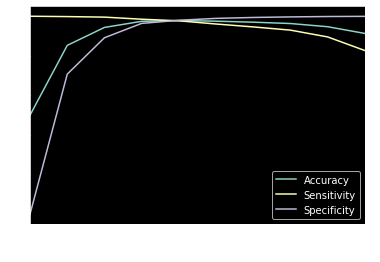

In [198]:
# Finding the Optimal Threshold Point
plt.figure(figsize = (8, 5))
measures.plot.line(x = 'Prob', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

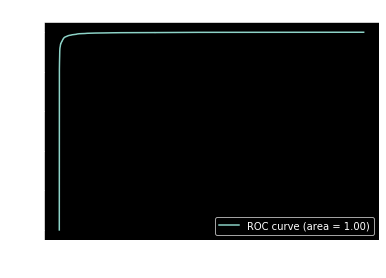

In [199]:
# ROC curve
FPR, TPR, threshold = metrics.roc_curve(cutoff['Actual'], cutoff['Pred'], drop_intermediate = False)
roc(cutoff['Actual'], cutoff['Pred'])

**Explanation**: The model has achieved the ROC score of 1.00 which is the highest and also from the above graph we can observe that the curve is hugging the TPR. This means that the model is able to identify fraudulent transactions correctly by reducing the FPR.

**Explanation**: Even though the optimal threshold limit was identified at 0.4 we cannot go ahead with this cut off point as the model was able to reach the accuracy and sensitivity of 97% and 97% respectively. According to the problem statement, we need to correctly identify fraudulent transactions inorder to reduce the loss from frauds. Hence factors like accuracy, sensitivity and FNR plays atmost importance. Keeping all this factors into consideration, the cut off limit is set at 0.3 at which the model is able to produce the best results by focusing more on sensitivity.

In [200]:
measures.loc[measures['Prob'] == 0.3].round(2)

,Prob,Accuracy,Sensitivity,FPR,Specificity,FNR
0.3,0.3,0.97,0.98,0.04,0.96,0.02


#### Subtask 3.3.3: Evaluation on Test data

In [201]:
# Assigning X and Y
Y_test = test_df['is_fraud']
X_test = test_df.drop(['is_fraud', 'city_pops'], axis = 1)

In [202]:
# Prediction and evaluation
Y_test_pred = rf_model.predict_proba(X_test)
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred = Y_test_pred[1]

In [207]:
# Test results
RF = pd.DataFrame()
RF['Actual'] = Y_test.values
RF['Pred'] = Y_test_pred.values
RF['Final'] = RF['Pred'].map(lambda x: 1 if x >= 0.3 else 0)
RF.head()

,Actual,Pred,Final
0,0,0.006107,0
1,0,0.006241,0
2,0,0.019457,0
3,0,0.005163,0
4,0,0.012762,0


In [208]:
# evaluating on the test data
evaluate(RF)

Evaluation Metrics
{'Accuracy': 0.96}
{'Sensitivity': 0.86}
{'Specificity': 0.96}
{'FNR': 0.14}
--------------------------------------------------
Confusion Metrics
[[531548  21098]
 [   287   1838]]


**Random Forest** model is performing good on the test data as well. All the evaluation metrics are within the permitable range. The model is performing well and is making correct predictions on the unseen test data. Random Forest has out-performed Logestic Regression but has failed to compete with Decision Tree in terms of sensitivity. However this can be further tunied in hyperparameter tuning by introducing more parameters for the model but unable do so, due to time complexity and system specs.

## Task 4: Model Selection

### Subtask 4.1: Comparing the models

In [209]:
# Logestic Regression
evaluate(LR)

Evaluation Metrics
{'Accuracy': 0.83}
{'Sensitivity': 0.83}
{'Specificity': 0.83}
{'FNR': 0.17}
--------------------------------------------------
Confusion Metrics
[[460899  91095]
 [   367   1758]]


In [210]:
# Decision Tree
evaluate(DT)

Evaluation Metrics
{'Accuracy': 0.93}
{'Sensitivity': 0.88}
{'Specificity': 0.93}
{'FNR': 0.12}
--------------------------------------------------
Confusion Metrics
[[516397  36249]
 [   248   1877]]


In [211]:
# Random Forest
evaluate(RF)

Evaluation Metrics
{'Accuracy': 0.96}
{'Sensitivity': 0.86}
{'Specificity': 0.96}
{'FNR': 0.14}
--------------------------------------------------
Confusion Metrics
[[531548  21098]
 [   287   1838]]


**Explanation**: All the models have performed significantly well on the training data, but when it comes to selecting the best model it all depends on the business problem. As per the business problem we need to correctly identify fraudulent transactions, which means sensitivty of the model should be high along with other evaluation metrics. 
1. Both Decision Tree and Random Forest models have outperformed Logestic Regression model with the above scores and also their AUC score is 1.00 which is the highest. 
2. Their is a tie between both the tree model as Decision Tree has high sensitivity and Random Forest has high specificity and Accuracy. Hence to decide the best model we need to performe Cost-Benefit Analysis. 

### Subtask 4.2: Cost-Benefit Analysis

In [62]:
cost = pd.read_csv('C:/demo/Credit_Card_Fraud/fraudTest.csv')

In [63]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
Unnamed: 0               555719 non-null int64
trans_date_trans_time    555719 non-null object
cc_num                   555719 non-null int64
merchant                 555719 non-null object
category                 555719 non-null object
amt                      555719 non-null float64
first                    555719 non-null object
last                     555719 non-null object
gender                   555719 non-null object
street                   555719 non-null object
city                     555719 non-null object
state                    555719 non-null object
zip                      555719 non-null int64
lat                      555719 non-null float64
long                     555719 non-null float64
city_pop                 555719 non-null int64
job                      555719 non-null object
dob                      555719 non-null object
trans_num                5

**Explanation**: calculating the cost benefit on the test data, which has the tranactions recorded for the year 2020.

**Strategy Plan**: The bank plans to provide a second layer of authentication for each of the transactions that the model predicts as fraudulent. If a payment gets flagged by the model, an SMS will be sent to the customer requesting them to call on a toll-free number to confirm the authenticity of the transaction. A customer experience executive will also be made available to respond to any queries if necessary. Developing this service would cost the bank $1.5 per fraudulent transaction.

#### Subtask 4.2.1: Cost incurred before ML

In [65]:
# Average number of transactions per month
print(round(len(cost.index)/7))

79388


In [66]:
# Average number of fraudulent transactions per month
print(round(len(cost.loc[cost['is_fraud'] == 1])/7))

306


In [67]:
# Total no of fraudulent transactions
len(cost.loc[cost['is_fraud'] == 1])

2145

In [68]:
# Total loss from fraudulent transactions
cost.loc[cost['is_fraud'] == 1]['amt'].sum().round()

1133325.0

In [69]:
# Average amount per fraud transactions
print((cost.loc[cost['is_fraud'] == 1]['amt'].sum()//len(cost.loc[cost['is_fraud'] == 1])))

528.0


In [70]:
# Cost incurred per month before the model was deployed
Before_cost = (528*306)
print(Before_cost)

161568


#### Subtask 4.2.2: Decision Tree

In [71]:
# Average number of transactions per month detected as fraudulent by the model (TF)
# TF = True Positive + False Positive / 7
TF = 1877 + 36249 //7
print(TF)

7055


In [72]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model 
# (TF*$1.5)
Tansaction_cost = (TF*1.5)
print(Tansaction_cost)

10582.5


In [73]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)
# FN = False Negative / 7
FN = (248 / 7)
print(round(FN))

35


In [76]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*cost per fraudulent trans)
Fraud_cost = (FN * 528)
Fraud_cost = round(Fraud_cost)
print(Fraud_cost)

18706


In [77]:
# Cost incurred per month after the model is built and deployed.
After_cost = Tansaction_cost + Fraud_cost
print(After_cost)

29288.5


In [78]:
# Final savings = Cost incurred before - Cost incurred after
Final_savings = (Before_cost - After_cost)
print(Final_savings)

132279.5


**Explanation**: Using Decision Tree model the bank can save up to $1,32,280 per month.

#### Subtask 4.2.3: Random Forest

In [79]:
# Average number of transactions per month detected as fraudulent by the model (TF)
# TF = True Positive + False Positive / 7
TF = 1838 + 21098 //7
print(TF)

4852


In [80]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model 
# (TF*$1.5)
Tansaction_cost = (TF*1.5)
print(Tansaction_cost)

7278.0


In [81]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)
# FN = False Negative / 7
FN = (287 / 7)
FN = round(FN)
print(FN)

41


In [82]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*cost per fraudulent trans)
Fraud_cost = (FN * 528)
print(Fraud_cost)

21648


In [83]:
# Cost incurred per month after the model is built and deployed.
After_cost = Tansaction_cost + Fraud_cost
print(After_cost)

28926.0


In [84]:
# Final savings = Cost incurred before - Cost incurred after
Final_savings = (Before_cost - After_cost)
print(Final_savings)

132642.0


**Explanation**: Using Random Forest model the bank can save up to $1,32,642 per month. Hence based on the Cost-Benefit Analysis, random forest model is more effecient compared to decision tree model. Summing up the entire analysis, random forest model is the best model to identify fraudulent transactions and is the most cost effecient model for Finex.